In [1]:
libraries = c("dplyr", "ggplot2")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE,quietly=TRUE) }

theme_set(theme_minimal(base_size=12)) 

print(R.Version()$version.string)

[1] "R version 4.0.0 Patched (2020-05-24 r78561)"


# Loading the dataset

In [2]:
df = read.csv("../data/JapaneseDataCOVID19 (200510).csv", encoding="UTF-8") %>%
    mutate(across(c("onset","confirmed","reported"), ~as.Date(.)))
df

exp_type,onset,confirmed,reported,is_asymptomatic
<chr>,<date>,<date>,<date>,<int>
imported,2020-01-03,NA,NA,0
imported,2020-01-14,NA,NA,0
imported,2020-01-21,NA,NA,0
imported,2020-01-23,NA,NA,0
imported,2020-01-22,NA,NA,0
imported,2020-01-26,NA,NA,0
domestic,2020-01-14,NA,NA,0
domestic,2020-01-20,NA,NA,0
domestic,2020-01-23,NA,NA,0


# Epidemic curve by illness onset

In [3]:
df %>% filter(!is.na(onset)) -> df_

print(paste0("Total number of cases with known date of illness onset: ", nrow(df_)))

[1] "Total number of cases with known date of illness onset: 12488"


`summarise()` ungrouping output (override with `.groups` argument)



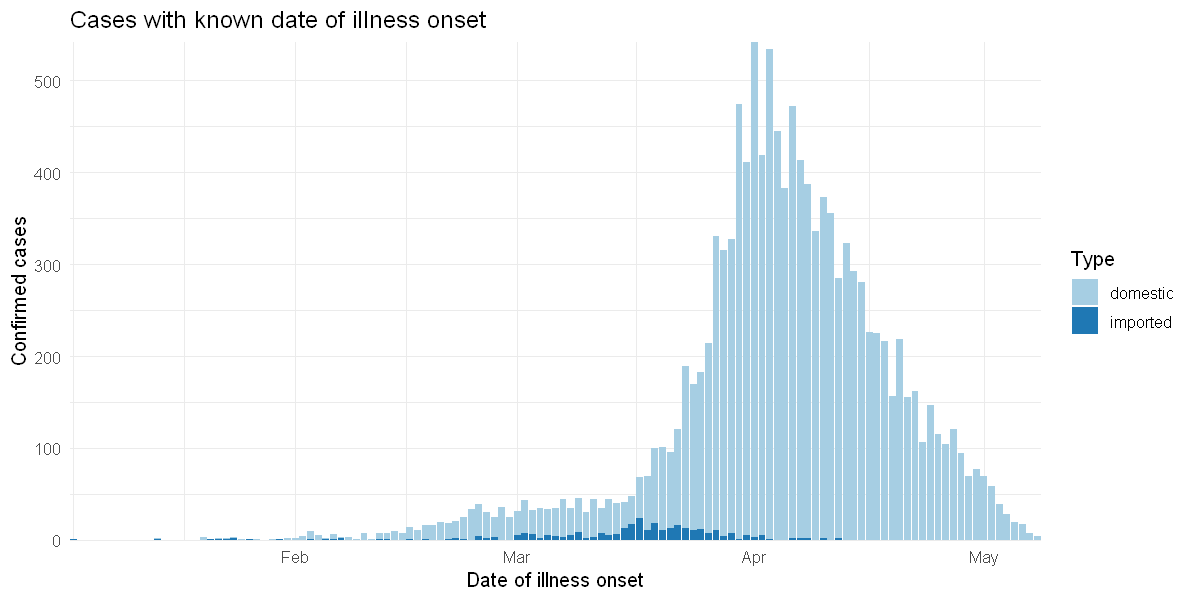

In [4]:
ymax = max(df_ %>% mutate(count=1) %>% group_by(onset) %>% summarize(count=sum(count)) %>% .$count)

options(repr.plot.width=10,repr.plot.height=5)
ggplot() + 
    geom_bar(data = df_, aes(x=onset, fill=exp_type)) +
    coord_cartesian(expand=0) +
    scale_fill_brewer(palette = "Paired") +
    ylim(c(0,ymax)) +
    labs(x="Date of illness onset", y="Confirmed cases", fill = "Type", title="Cases with known date of illness onset")

# Cases with unknown date of illness onset

In [5]:
df %>% filter(is.na(onset)) -> df_

print(paste0("Total number of cases with unknown date of illness onset: ", nrow(df_)))

[1] "Total number of cases with unknown date of illness onset: 2916"


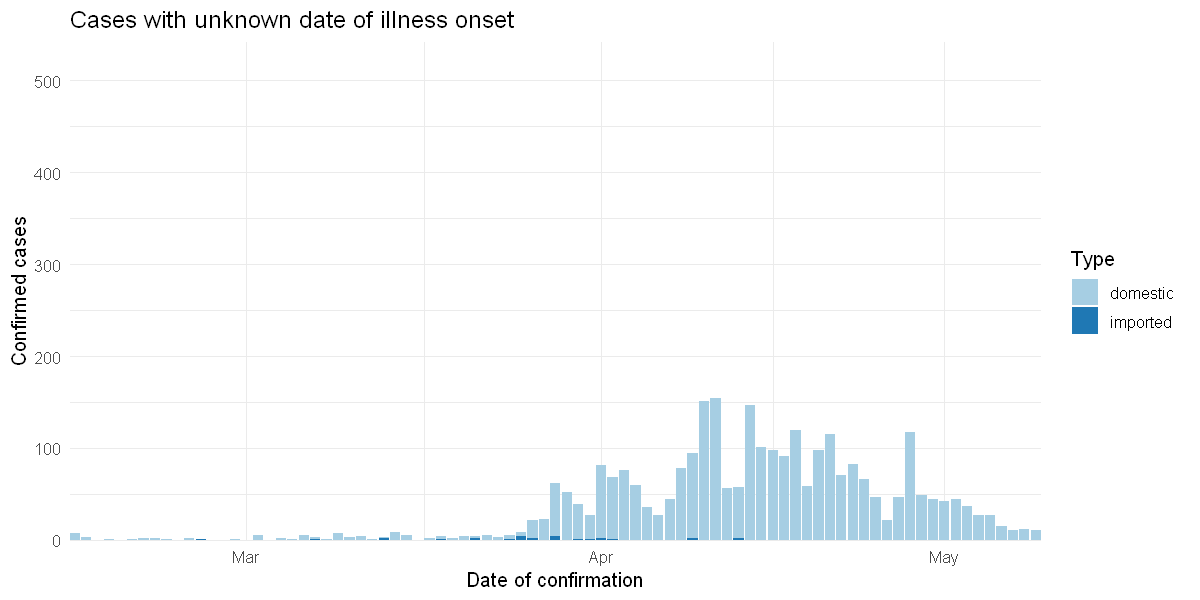

In [6]:
options(repr.plot.width=10,repr.plot.height=5)
ggplot() + 
    geom_bar(data = df_ %>% mutate(known_event = if_else(is.na(confirmed), reported, confirmed)), 
                                   aes(x=known_event, fill=exp_type)) +
    coord_cartesian(expand=0) +
    scale_fill_brewer(palette = "Paired") +
    ylim(c(0,ymax)) +
    labs(x="Date of confirmation",
         y="Confirmed cases", fill = "Type", 
         title="Cases with unknown date of illness onset")